<a href="https://colab.research.google.com/github/eungyu321/ABCD-A/blob/main/%EC%8B%9C%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지 최대 2장을 업로드하세요.


Saving 1111.png to 1111 (2).png

🔍 이미지 1 분석 중: 1111 (2).png
Results saved to runs/detect/predict11
😺 감지된 고양이 수: 5


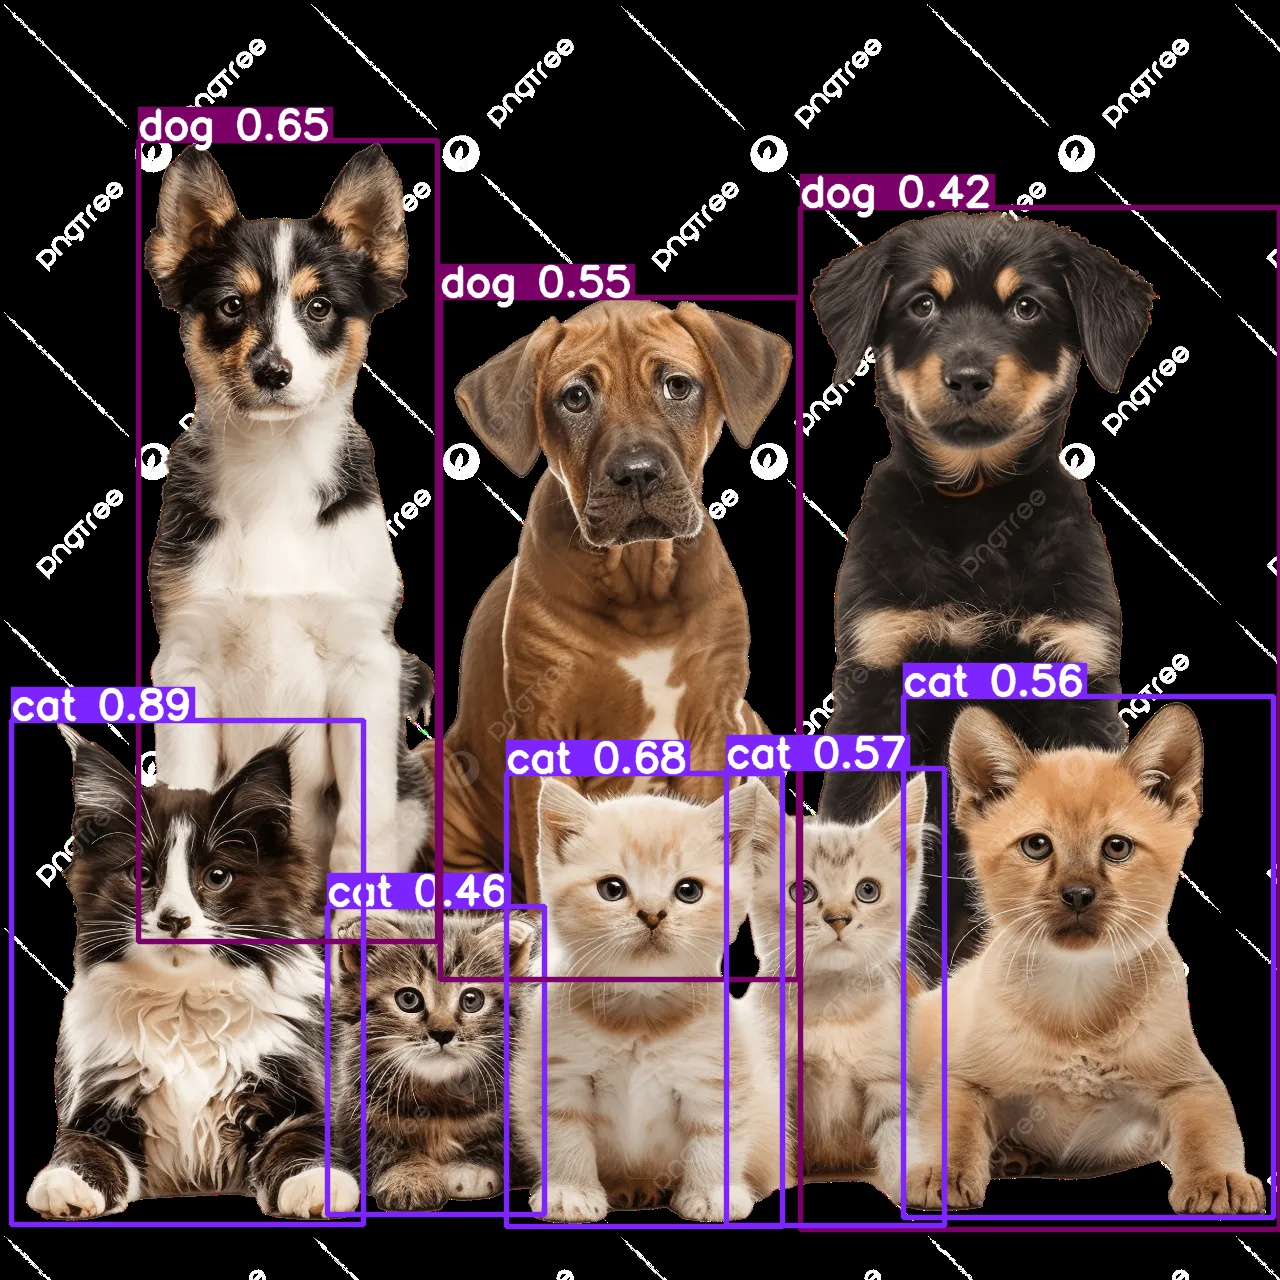


✅ 총 고양이 수: 5 마리


In [14]:
# 📦 1. YOLOv8 설치 (Ultralytics 최신 버전 필요)
!pip install -q ultralytics

# 📚 2. 라이브러리 불러오기
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image as IPyImage, display
import os, glob

# 🖼️ 3. 이미지 업로드
print("이미지 최대 2장을 업로드하세요.")
uploaded = files.upload()

# ✅ 업로드 이미지 체크
if len(uploaded) == 0:
    raise ValueError("❌ 이미지가 업로드되지 않았습니다.")
elif len(uploaded) > 2:
    print("⚠️ 2장까지만 사용할 예정입니다. 앞의 2장만 처리합니다.")

image_paths = list(uploaded.keys())[:2]

# 🧠 4. YOLOv8 모델 로드 (nano, small, medium, large 선택 가능)
model = YOLO('yolov8m.pt')  # YOLOv8 중간 크기 모델 사용

# 🐱 5. 고양이 탐지 및 시각화
total_cats = 0
result_files = []

for idx, path in enumerate(image_paths):
    print(f"\n🔍 이미지 {idx+1} 분석 중: {path}")
    results = model.predict(source=path, save=True, imgsz=640, conf=0.35, verbose=False)

    boxes = results[0].boxes
    class_ids = boxes.cls.tolist()

    # 클래스 ID 15는 COCO 기준 '고양이'
    cat_count = class_ids.count(15)
    total_cats += cat_count

    # 결과 이미지 경로 찾기 (확장자 무관)
    latest_folder = sorted(glob.glob('runs/detect/*'), key=os.path.getctime)[-1]
    result_img = glob.glob(f'{latest_folder}/*.*')[0]

    print(f"😺 감지된 고양이 수: {cat_count}")
    display(IPyImage(filename=result_img))
    result_files.append(result_img)

# 🧾 6. 총 고양이 수 출력
print(f"\n✅ 총 고양이 수: {total_cats} 마리")
